# Customer Churn Prediction

## Overview
Customer churn means when a customer leaves a company or stops using its services.  
Our goal is to build a Machine Learning model that can predict whether a customer will **churn (Yes)** or **stay (No)**.

We'll use the **Telco Customer Churn dataset**, which includes customer demographics, account information, and service usage.

---

### Cover:
1. Import Libraries and Load Data  
2. Explore and Understand the Data (EDA)  
3. Clean and Preprocess Data  
4. Encode Categorical Variables  
5. Train a Classification Model (Logistic Regression)  
6. Evaluate Model Performance  
7. Visualize Results and Conclusions

- - -


## Import Libraries and Load Dataset

We'll start by importing the essential Python libraries for data analysis and machine learning,  
and then load our dataset (`telco_customer_churn.csv`) to inspect the first few rows.

In [118]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pre-processing and Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns',None)

data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls')

print("data Shape:", data.shape)
data.head()




data Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- - -


##  Explore and Understand the Data {EDA}

Before training a model, let's explore our dataset:
- Check for missing values  
- Look at data types  
- View summary statistics  
- Understand target variable distribution (`Churn`)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [120]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [121]:
# View basic statistics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


count = 7043 → No missing values in these columns.

SeniorCitizen mean ≈ 0.16 → ~16% of customers are seniors.
tenure mean ≈ 32.37 → Average customer has been with the company ~32 months.
MonthlyCharges mean ≈ 64.76 → Average monthly charge is ~$64.76

tenure std ≈ 24.56 → Some customers have very short tenure, some very long.
MonthlyCharges std ≈ 30.09 → Monthly charges vary a lot.

Target Variable Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


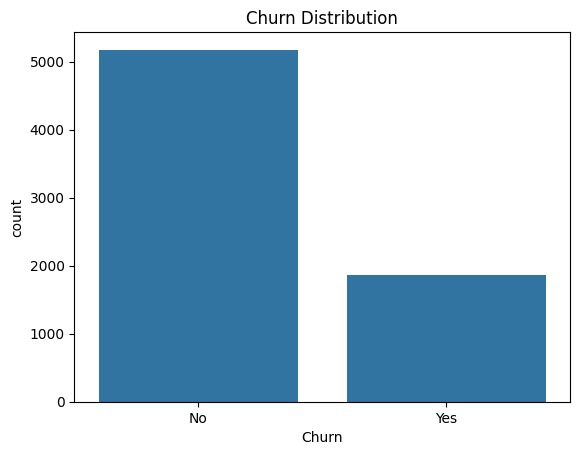

In [122]:
# Check class distribution
print("Target Variable Distribution:")
print(data['Churn'].value_counts())
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

- - -

## Clean & Prepare Data

We need to:
1. Convert `TotalCharges` from object to numeric  
2. Drop `customerID` (not a predictive feature)  
3. Encode all categorical variables into numeric & Verify data types before encoding

In [123]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [124]:
print(data['TotalCharges'].isnull().sum())

11


In [125]:
median_total = data['TotalCharges'].median()
print(median_total)
data['TotalCharges'].fillna(median_total, inplace=True)

1397.475


/var/folders/f3/ny_qtwdj1cb_cdrm5xqb0w3h0000gn/T/ipykernel_48149/3988789447.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(median_total, inplace=True)


In [126]:
print(data['TotalCharges'].isnull().sum())

0


In [127]:
data.drop('customerID', axis=1, inplace=True)

In [128]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- - -

## Encoding Categorical Variables

Machine learning models need numeric inputs. We'll:
1. Encode all categorical features (object type columns) into numbers  
2. Encode the target variable `Churn` (Yes → 1, No → 0)

In [129]:
cat_cols = data.select_dtypes(include=['object']).columns
print("Catagorical columns:\n", list(cat_cols))

Catagorical columns:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [130]:
# Initialize LabelEncoder
le = LabelEncoder()

# Note one got encoding could work better here as this is nominal data and order doesnt matter,research more

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Spliting Data into Train & Test Sets

We’ll separate:
- **X (features):** all columns except `Churn`  
- **y (target):** the `Churn` column  

Then, we’ll split into:
- 80% training data  
- 20% testing data  
This helps evaluate the model on unseen data.

In [131]:
# input features
X = data.drop('Churn',axis=1)

# target
y = data['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 19)
Testing set shape: (1409, 19)


- - -

## Feature Scaling

We'll standardize features using `StandardScaler`.  
This ensures all features contribute equally to the model and improves training stability.

In [132]:
scaler = StandardScaler()

# Fit on training data and transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression Model

We'll use **Logistic Regression**, a simple but powerful baseline model  
for binary classification tasks like churn prediction.

In [133]:
model = LogisticRegression(max_iter = 1000)

In [134]:
model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [135]:
y_pred = model.predict(X_test_scaled)

## Lets Evaluate the Model

We’ll evaluate our Logistic Regression model using:
- **Accuracy Score:** overall correctness  
- **Confusion Matrix:** to visualize prediction results  
- **Classification Report:** detailed precision, recall, and F1-score

These help us see how well the model distinguishes customers who churn vs those who stay.

In [136]:
accuracy = accuracy_score(y_test,y_pred)
acc_percentile = accuracy*100
print(f"Model Accuracy: {acc_percentile:.2f}%")

Model Accuracy: 81.55%


In [137]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

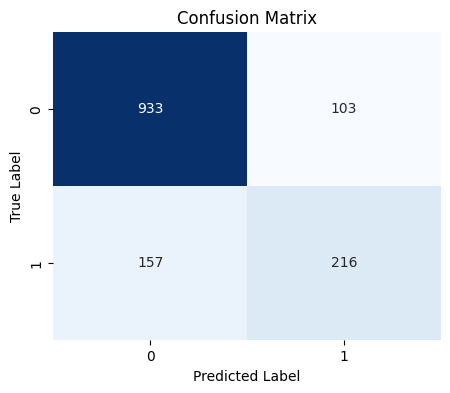

In [138]:
# Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [139]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



	•	Class 0 (Non-Churners):
	•	High precision (0.86) and recall (0.90) → model predicts non-churners very well.
	•	Class 1 (Churners):
	•	Precision = 0.68 → When the model predicts churn, it’s correct 68% of the time.
	•	Recall = 0.58 → Model only catches 58% of actual churners.
	•	F1 = 0.62 → Balance of precision & recall; okay, but there’s room to improve.

Insight: The model is biased toward non-churners, likely because the dataset is imbalanced (fewer churners than non-churners).

⸻


- - -

# Lets try Random Forest now

# Random Forest Classifier

Random Forest is an ensemble model that combines multiple decision trees.  
It usually performs better than Logistic Regression and can capture non-linear relationships in data.  
We will:
1. Train the model on scaled features  
2. Predict churn on the test set  
3. Evaluate performance

In [140]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    random_state=42,
    class_weight='balanced'  # handle class imbalance
)

# Train model
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluating Random Forest

We'll check:
- Accuracy  
- Confusion Matrix  
- Classification Report  
to compare performance against Logistic Regression.

In [141]:
accuracy = accuracy_score(y_test,y_pred_rf)
acc_percentile = accuracy*100
print(f"Model Accuracy: {acc_percentile:.2f}%")

Model Accuracy: 79.13%


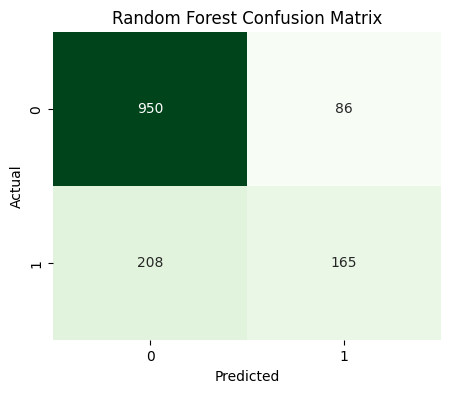

In [142]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [143]:
print("\n Classification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))


 Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.44      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



	Random Forest Accuracy: 0.79 → 79%
	•	Slightly lower than Logistic Regression (82%).

This can happen because accuracy is dominated by the majority class (non-churners). RF may trade some overall accuracy to better capture class patterns.

    Class 0 (Non-churners): still high precision and recall.
	•	Class 1 (Churners): recall dropped to 0.44 → only 44% of actual churners are captured.

So Random Forest didn’t improve recall for churners. Logistic Regression (58% recall) actually caught more churners in this case.

- - -

## Check Class Distribution

Let's see how many customers **churned** vs **did not churn** in our dataset.  
This helps us understand class imbalance before trying more advanced techniques.

Churn
0    5174
1    1869
Name: count, dtype: int64


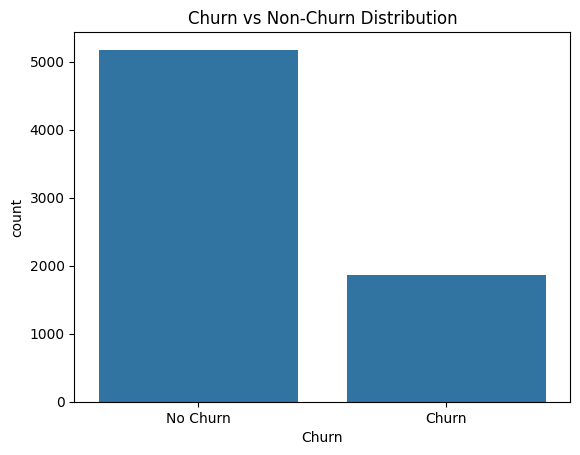

In [144]:
# Count of churners vs non-churners
class_counts = data['Churn'].value_counts()
print(class_counts)

# Optional: visualize with a bar chart
sns.countplot(x='Churn', data=data)
plt.title("Churn vs Non-Churn Distribution")
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.show()

- - -

## TIME TO TRY SOMETHING ELSE

SMOTE

What is SMOTE = Synthetic Minority Oversampling Technique.<br>
	•	The idea: create synthetic examples of the minority class (here, churners) instead of just duplicating them.
	•	Helps models learn patterns of minority class better and improve recall.
	•	Works after splitting data into train/test — we only oversample training data, never test data.

In [145]:
from imblearn.over_sampling import SMOTE

## Apply SMOTE to Oversample Churners

We'll only oversample the **training set**.  
The test set stays untouched to evaluate real-world performance.

In [146]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply to training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 4138, 1: 1496})
After SMOTE: Counter({0: 4138, 1: 4138})


## Lets try again Random Forest on Oversampled Data

In [147]:
rf_model_smote = RandomForestClassifier(
    n_estimators = 100,
    random_state = 42
)

In [148]:
rf_model_smote.fit(X_train_smote,y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [149]:
y_pred_rf_smote = rf_model_smote.predict(X_test_scaled)

##  Evaluate again SMOTE Random Forest

We'll check:
- Accuracy  
- Confusion Matrix  
- Classification Report

= Random Forest (SMOTE) Accuracy: 78.14%


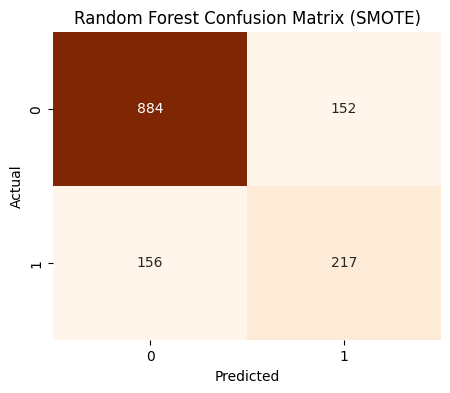


📋 Classification Report (Random Forest + SMOTE):
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [150]:
# Accuracy
accuracy_smote = accuracy_score(y_test, y_pred_rf_smote)
print(f"= Random Forest (SMOTE) Accuracy: {accuracy_smote*100:.2f}%")

# Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_rf_smote)
plt.figure(figsize=(5,4))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Random Forest Confusion Matrix (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n📋 Classification Report (Random Forest + SMOTE):")
print(classification_report(y_test, y_pred_rf_smote))

- - -

# NOW FOR LOGISTIC REGRESSION

In [151]:
lr_model_smote = LogisticRegression(max_iter = 1000)

In [152]:
lr_model_smote.fit(X_train_smote,y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [153]:
y_pred_lr_smote = lr_model_smote.predict(X_test_scaled)

= Logistic Regression (SMOTE) Accuracy: 75.87%


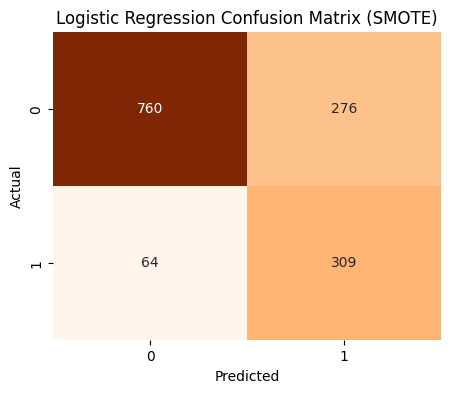


📋 Classification Report (Logistic Regression + SMOTE):
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1036
           1       0.53      0.83      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



In [155]:
# Accuracy
accuracy_smote = accuracy_score(y_test, y_pred_lr_smote)
print(f"= Logistic Regression (SMOTE) Accuracy: {accuracy_smote*100:.2f}%")

# Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_lr_smote)
plt.figure(figsize=(5,4))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Logistic Regression Confusion Matrix (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n📋 Classification Report (Logistic Regression + SMOTE):")
print(classification_report(y_test, y_pred_lr_smote))